In [37]:
pip install sklearn-nature-inspired-algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.9/181.9 kB 5.4 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


from pso_thesis import *
from firefly_thesis import *

#**Data Analysis**

In [39]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [41]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [42]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [43]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [44]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [45]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [46]:
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [47]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

# **Data Visulaization**

In [48]:
Risk = df.RiskLevel.value_counts()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

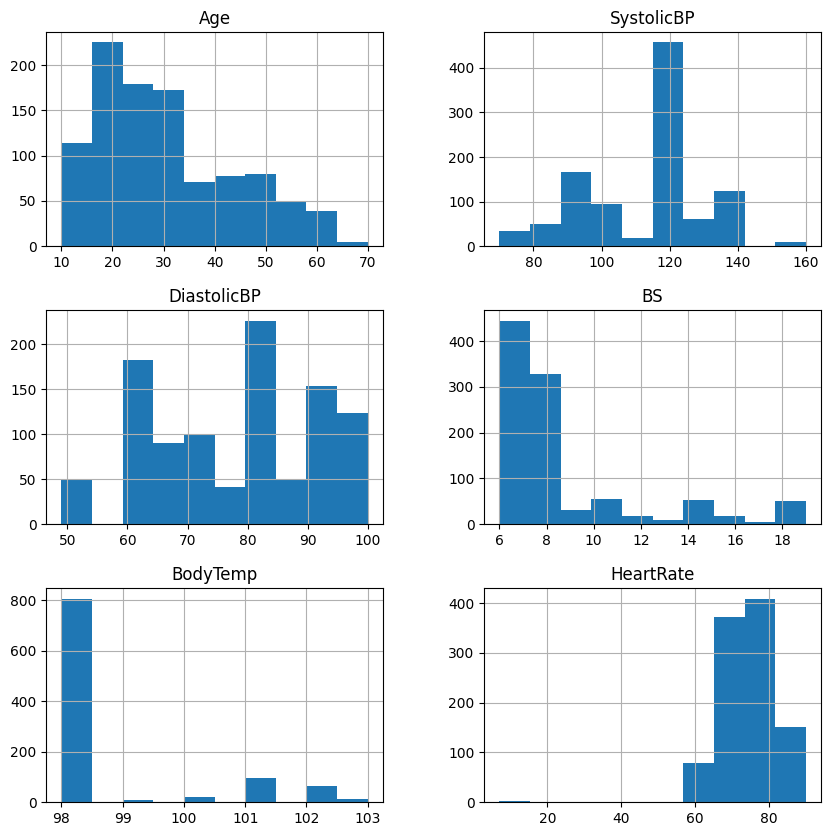

In [49]:
df.hist(figsize=(10, 10))

RiskLevel
high risk    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
low risk     [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
mid risk     [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

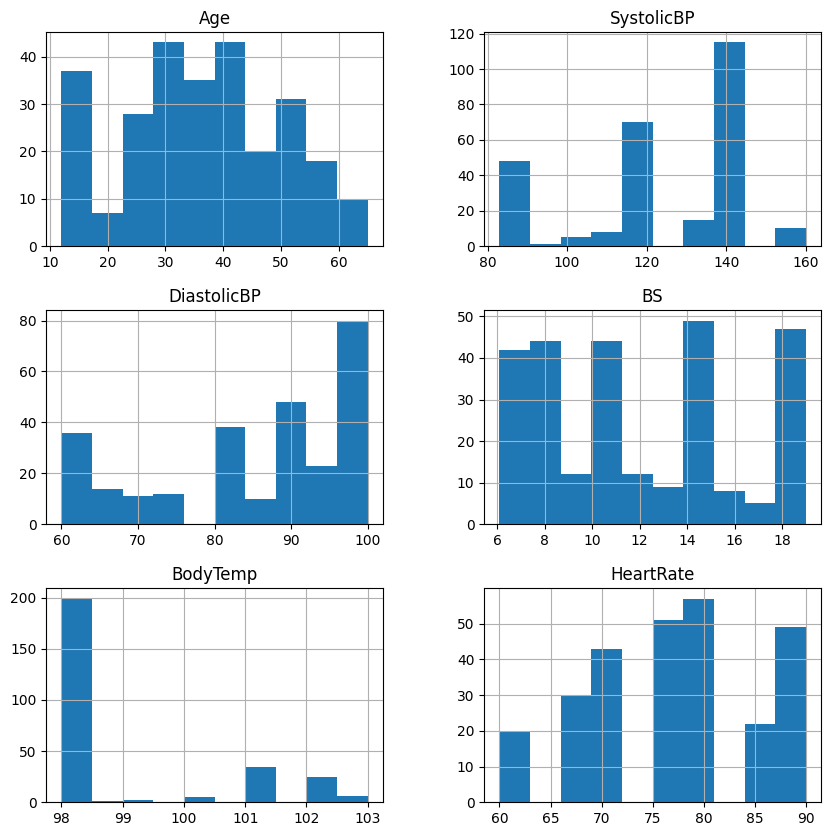

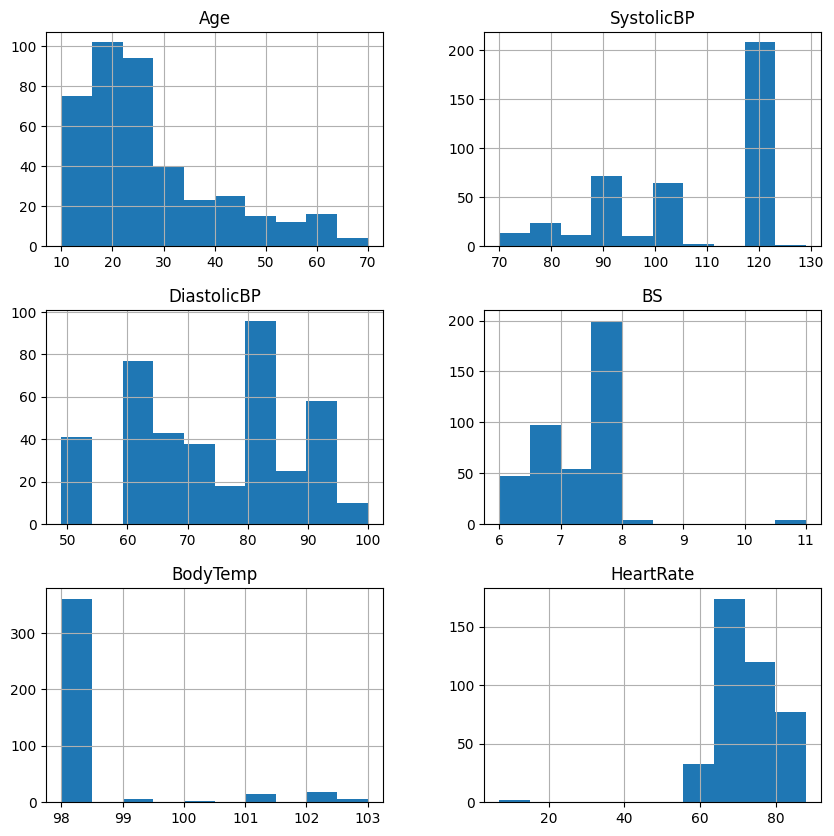

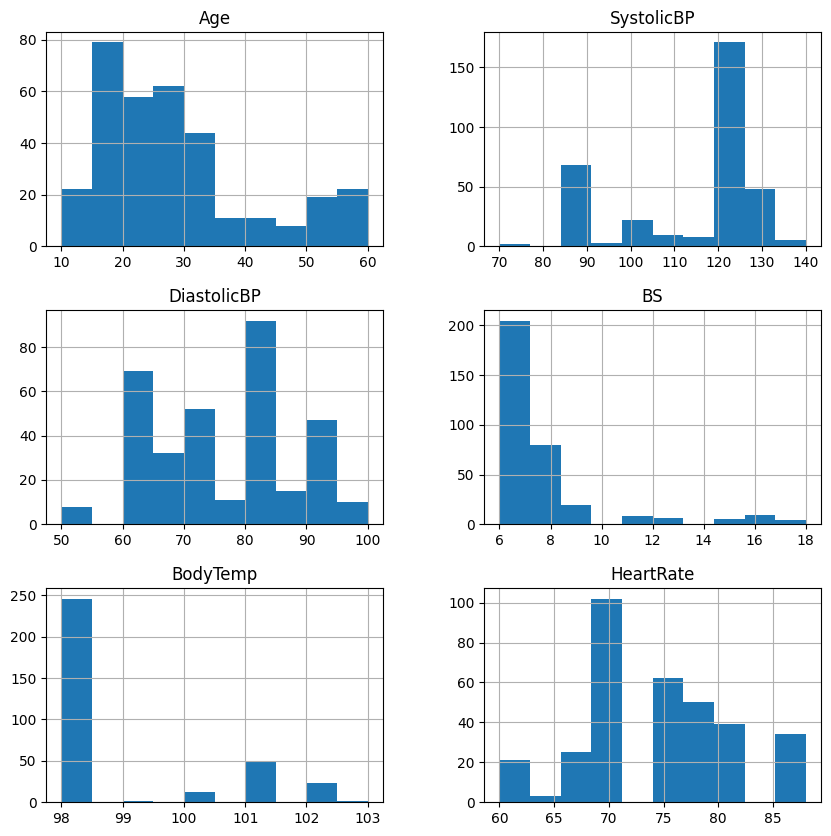

In [50]:
df.groupby('RiskLevel').hist(figsize=(10,10))

In [51]:
risk_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}

In [52]:
df['RiskLevel'] = df['RiskLevel'].map(risk_map)

In [53]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [54]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-54-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.00,0.42,0.40,0.47,-0.26,0.08,0.27
SystolicBP,0.42,1.00,0.79,0.43,-0.29,-0.02,0.40
DiastolicBP,0.40,0.79,1.00,0.42,-0.26,-0.05,0.35
BS,0.47,0.43,0.42,1.00,-0.10,0.14,0.57
BodyTemp,-0.26,-0.29,-0.26,-0.10,1.00,0.10,0.16
HeartRate,0.08,-0.02,-0.05,0.14,0.10,1.00,0.19
RiskLevel,0.27,0.40,0.35,0.57,0.16,0.19,1.00


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

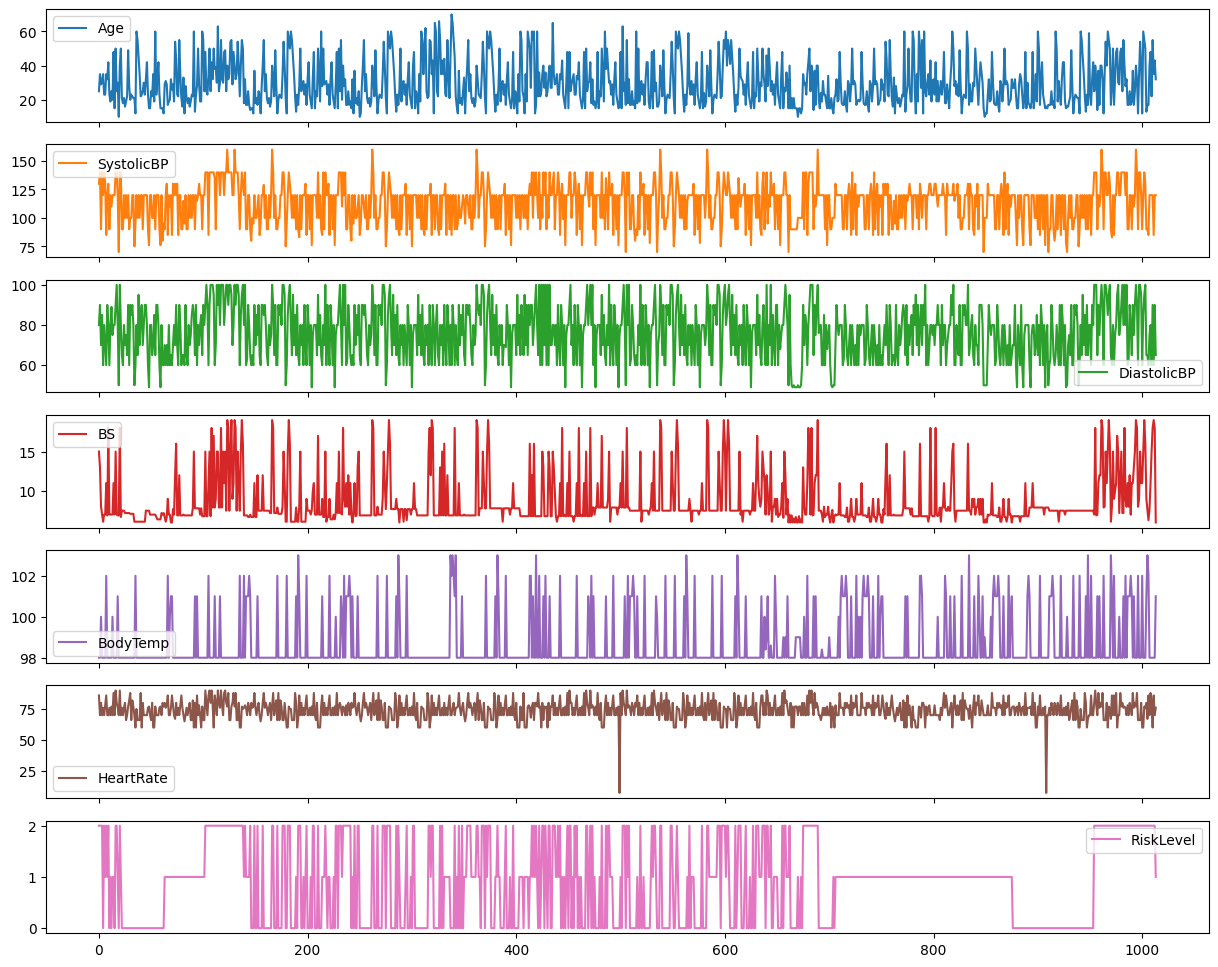

In [55]:
df.plot(subplots=True, figsize=(15, 12))

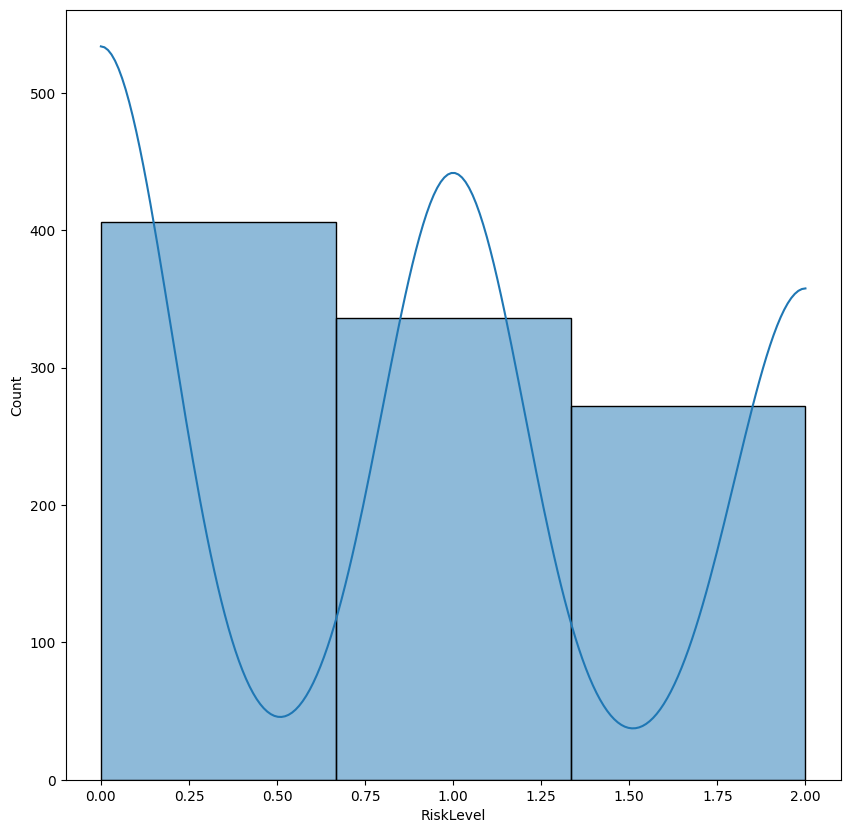

In [56]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='RiskLevel', bins=3, kde=True)
plt.show()

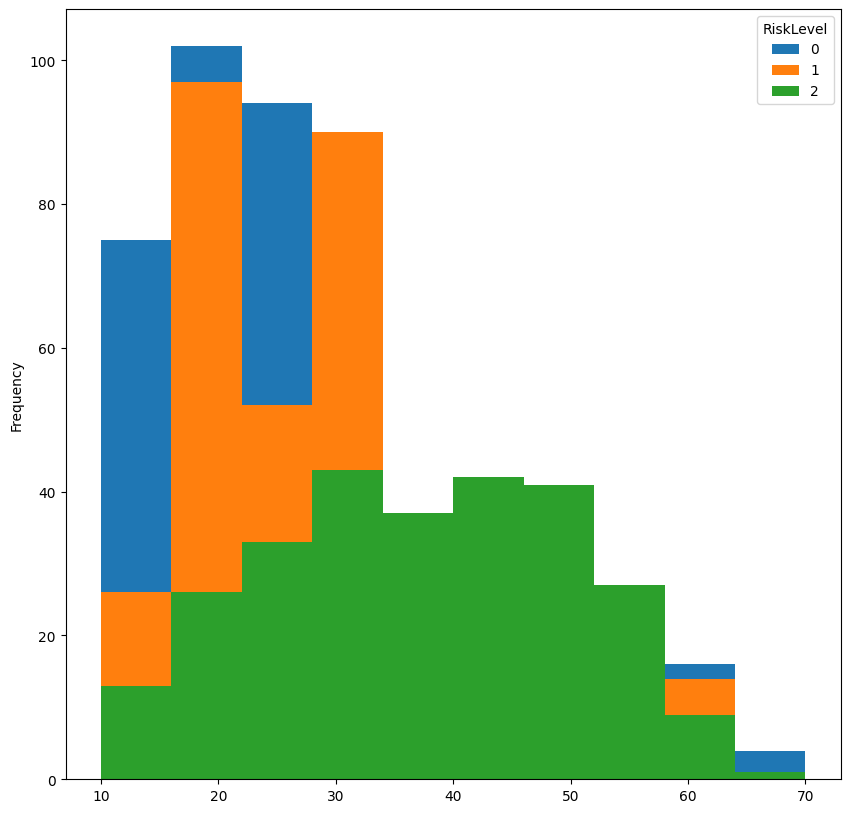

In [57]:
df.pivot(columns='RiskLevel', values='Age').plot.hist(figsize=(10,10))
plt.show()

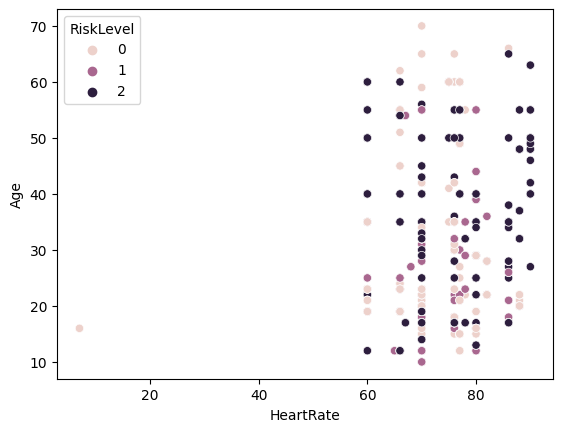

In [58]:
sns.scatterplot(x="HeartRate", y="Age", 
                hue="RiskLevel",data = df);

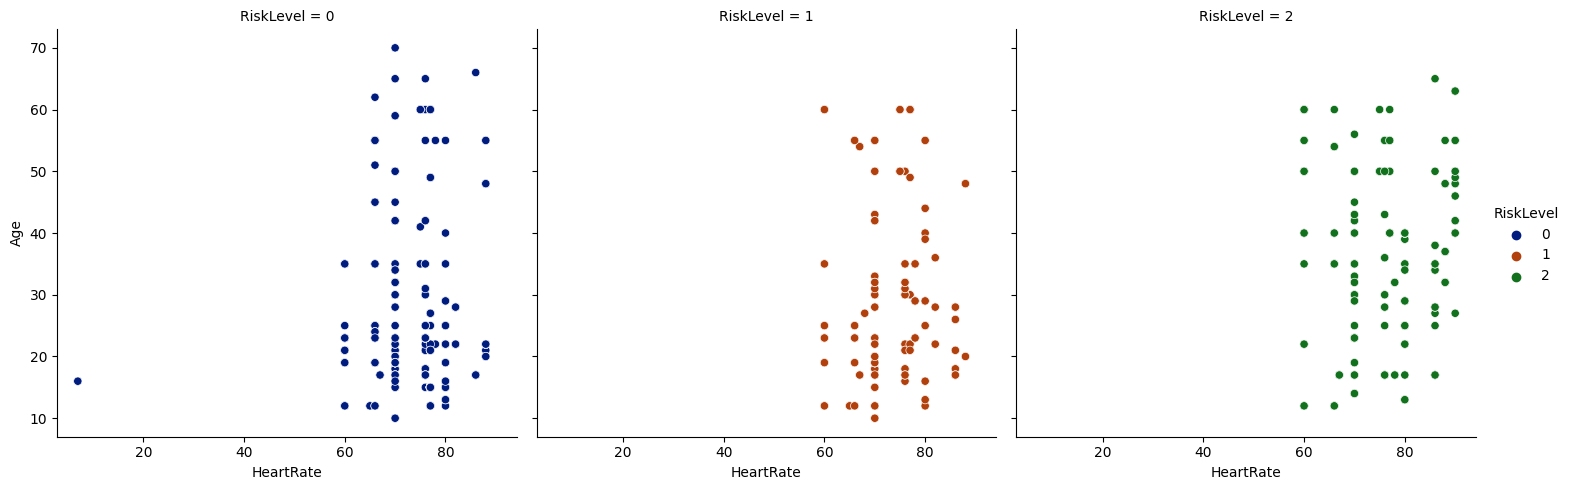

In [59]:
sns.relplot(x="HeartRate", y="Age", hue="RiskLevel",
            col="RiskLevel",palette='dark', data=df)

# **Model Building**

In [60]:
df = df.apply(LabelEncoder().fit_transform)

In [61]:
X = df.drop('RiskLevel', axis= 1)
y = df['RiskLevel']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=None)

In [63]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [64]:
#create dummies
x_train=pd.get_dummies(X_train)
x_test=pd.get_dummies(X_test)

**Normal BaggingClassifier and XGBClassifier**

In [65]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7480314960629921

In [66]:
import xgboost as xgb

model1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.7086614173228346

**Fitness Function XGBoost**

In [67]:
params_XG = {
    'n_estimators': (10, 100),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1),
    'colsample_bytree': (0.1, 1),
    'gamma': (0, 10)
}

In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def fitness_function_XGboost(x):
    # x[0] = max_depth, x[1] = learning_rate, x[2] = min_child_weight
    
    # Define XGBoost classifier with the hyperparameters
    clf = xgb.XGBClassifier(n_estimators=int(x[0]),max_depth=int(x[1]), learning_rate=x[2], min_child_weight=int(x[3]),
                            subsample =x[4],colsample_bytree=x[5], gamma =x[6], random_state=42)
    
    # Compute cross-validation scores
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    
    return scores.mean()

**Predefined Algorithm**

In [69]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

In [70]:
nia_search = NatureInspiredSearchCV(
    model1,
    params_XG,
    cv=5,
    verbose=1,
    algorithm='hba',
    population_size=50,
    max_n_gen=20,
    max_stagnating_gen=100,    
    runs=10,
    scoring='f1_macro',
    random_state=42,
)

nia_search.fit(x_train, y_train)

Fitting 5 folds for some of the 128 candidates, which might total in 640 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candida

NatureInspiredSearchCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_...
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='multi:softprob',
                                               predictor=None, ...),
                       max_n_gen=20, max_stagnating_gen=100,
                       param_grid={'colsample_bytree': (0.1, 1),
                                   'gamma': (0, 10), 'learning_rate': (0.01, 1),
                                   'max_depth': (3, 10),
                                   'min_child_weight': (1, 10),
                                   'n_estimators': (10, 100),
                                   'subsample': (0.1, 1)},
                       random_state=42, runs=10, scoring='f1_macro', verbose=1)

In [71]:
nia_search.best_params_

{'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 1,
 'min_child_weight': 1,
 'subsample': 1,
 'colsample_bytree': 1,
 'gamma': 0}

In [72]:
from sklearn.metrics import classification_report
model1=xgb.XGBClassifier(random_state=42,**nia_search.best_params_)

model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8276    0.8182    0.8229        88
           1     0.7273    0.7912    0.7579        91
           2     0.8529    0.7733    0.8112        75

    accuracy                         0.7953       254
   macro avg     0.8026    0.7942    0.7973       254
weighted avg     0.7991    0.7953    0.7961       254



# **Optimization**

In [422]:
# Define the search space intervals
intervals =  [(10, 100),(1, 10), (0.001, 1.0), (1, 10),(0.1, 1),(0.1, 1),(0, 10)]

# Define the number of particles in the population
population_size = 20

# Define the maximum number of iterations
max_iterations = 3

# Initialize the population
population1 = [[random.uniform(interval[0], interval[1]) for interval in intervals] for _ in range(population_size)]

**XGBoost----PSO Algorithm**

In [423]:
# Run the PSO algorithm
global_best_position_XGB, fitnesses_XGB = PSO(population1, fitness_function_XGboost, intervals, max_iterations, c1=2, c2=2)


In [75]:
print("Global best position:", global_best_position_XGB)

Global best position: [40.76599953085329, 9.04155474885181, 1.0, 10, 1, 1, 0]


In [76]:
global_best_position_XGB

[40.76599953085329, 9.04155474885181, 1.0, 10, 1, 1, 0]

In [80]:
global_best_position_XGB[0] = round(global_best_position_XGB[0])
global_best_position_XGB[1] = round(global_best_position_XGB[1])
global_best_position_XGB

[41, 9, 1.0, 10, 1, 1, 0]

In [81]:
print("Fitness:", fitness_function_XGboost(global_best_position_XGB))
#print("Fitness:", fitness_function4(global_best_position))

Fitness: 0.7929824561403509


In [82]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_XGB = xgb.XGBClassifier(n_estimators= global_best_position_XGB[0],
                              max_depth=global_best_position_XGB[1],
                              learning_rate=global_best_position_XGB[2],
                              min_child_weight=global_best_position_XGB[3],
                              subsample =global_best_position_XGB[4],
                              colsample_bytree=global_best_position_XGB[5],
                              gamma =global_best_position_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_XGB.fit(x_train, y_train)
accuracy = model_XGB.score(x_train, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.75%


In [83]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [84]:
#predict labels for test set
y_test = model_XGB.predict(x_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.9133858267716536
Precision:  0.913930475636885
Recall:  0.9133858267716536
F1 Score:  0.9133408733893474


In [85]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')


In [86]:
print(roc_auc)

0.9997228009259259


In [87]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        64

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254



<Axes: >

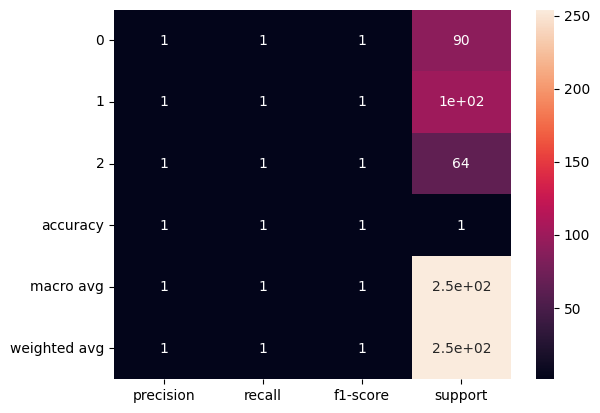

In [88]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True)



**XGBoost----Firefly Algorithm**

In [89]:
# Run the firefly algorithm to find the optimal solution
best_solution_XGB, best_fitness_XGB = firefly_algorithm(population, fitness_function_XGboost, intervals, 
                                                max_iterations, alpha=0.2, beta=1, gamma=1)


In [90]:
# Print the results
print("Best solution: ", best_solution_XGB)
print("Best fitness: ", best_fitness_XGB)

Best solution:  [92.90363989383677, 7.518346865564073, 1.0, 9.950125805263712, 1, 0.9753062530036094, 0]
Best fitness:  0.7964912280701754


In [96]:
best_solution_XGB[0] = round(best_solution_XGB[0])
best_solution_XGB[1] = round(best_solution_XGB[1])

In [97]:
best_solution_XGB

[93, 8, 1.0, 9.950125805263712, 1, 0.9753062530036094, 0]

In [98]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_Bag = xgb.XGBClassifier(n_estimators= best_solution_XGB[0],
                              max_depth=best_solution_XGB[1],
                              learning_rate=best_solution_XGB[2],
                              min_child_weight=best_solution_XGB[3],
                              subsample =best_solution_XGB[4],
                              colsample_bytree=best_solution_XGB[5],
                              gamma =best_solution_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_Bag.fit(X_train, y_train)
accuracy = model_Bag.score(X_train, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.51%


In [99]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [100]:
# predict labels for test set
y_test = model_Bag.predict(x_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


**Bagging Fitness Function**

In [101]:
param_space = [{
    'n_estimators': (10, 100),
    'max_samples': (0.1, 1.0),
    'max_features': (0.1, 1.0),
    'bootstrap': (True, False),
    'bootstrap_features': (True, False)
}]

In [484]:
def fitness_function_BAG(x):
    # x[0] = n_estimators, x[1] = max_samples, x[2] = max_features, x[3] = bootstrap, x[4] = bootstrap_features
    
    # Define BaggingClassifier with the hyperparameters
    clf = BaggingClassifier(n_estimators=int(x[0]), max_samples=int(x[1]), max_features=x[2], 
                            bootstrap=bool(x[3]), bootstrap_features=bool(x[4]))
    
    # Compute cross-validation scores
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    return scores.mean()

In [104]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.1, 0.5, 0.9],
    'max_features': [0.1, 0.5, 0.9],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]}

**Bagging---PSO Algorthm**

In [160]:
max_features= list(range(0, 1))
max_samples=list(range(0, 1))

In [405]:
# Clip population values so that they are within the specified range and are non-negative
def clip_pop(pop, intervals):
    return [[max(min(sublist[i], intervals[i][1]), intervals[i][0], 0) for i in range(len(sublist))] for sublist in pop]

# Update the position of a particle based on its velocity, within the specified range and non-negative
def update_position(particle, velocity, intervals):
    new_particle = [particle[i] + velocity[i] for i in range(len(particle))]
    new_particle = [max(min(new_particle[i], intervals[i][1]), intervals[i][0], 0) for i in range(len(new_particle))]
    return new_particle

# Run the particle swarm optimization algorithm to find the optimal solution for the SVM fitness function, avoiding values out of range and negative values
def PSO(population, fitness_function, intervals, max_iter, c1, c2):
    # Initialize the velocities with random values
    velocities = [[random.uniform(-1, 1) for i in range(len(intervals))] for _ in range(len(population))]

    # Initialize the positions of the particles with random values within the specified intervals
    population = clip_pop([[random.uniform(intervals[i][0], intervals[i][1]) for i in range(len(intervals))] for _ in range(len(population))], intervals)

    # Initialize the best positions with the current positions
    best_positions = population[:]

    # Initialize the global best position with the best position of the first particle
    global_best_position = best_positions[0]

    # Iterate over the maximum number of iterations
    for _ in range(max_iter):
        # Calculate the fitness of each particle using the SVM fitness function
        fitnesses = [fitness(particle, fitness_function) for particle in population]

        # Update the best positions and global best position
        for i in range(len(population)):
            if fitnesses[i] > fitness(best_positions[i], fitness_function):
                best_positions[i] = population[i][:]
            if fitnesses[i] > fitness(global_best_position, fitness_function):
                global_best_position = population[i][:]

        # Update the velocity and position of each particle
        for i in range(len(population)):
            velocities[i] = update_velocity(population[i], best_positions[i], global_best_position, velocities[i], c1, c2)
            population[i] = update_position(population[i], velocities[i], intervals)

    # Return the global best position and the population and fitness of each particle
    return global_best_position, fitnesses


In [420]:
intervals_bag =  [(10, 100),(0.1, 0.5, 0.9),(0.1, 0.5, 0.9),(True, False),(True, False)]

In [386]:
#population = [[random.uniform(lower_bound, upper_bound) for lower_bound, upper_bound in intervals_bag] for _ in range(10)]

In [431]:
global_best_position_BAG, fitnesses = PSO(population1, fitness_function_BAG, intervals_bag, max_iter=max_iterations, c1=1, c2=1)

In [432]:
# Print the results
print("Global best position:", global_best_position_BAG)
print("Fitness:", fitness_function_BAG(global_best_position_BAG))

Global best position: [52.08220203844286, 0.5, 0.5, True, True]
Fitness: 0.7526315789473684


In [433]:
global_best_position_BAG[0] = round(global_best_position_BAG[0])
#global_best_position_BAG[1] = round(global_best_position_BAG[1])

In [434]:
global_best_position_BAG

[52, 0.5, 0.5, True, True]

In [435]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model3 = BaggingClassifier(n_estimators=global_best_position_BAG[0],
                                 max_samples =  global_best_position_BAG[1],
                                 max_features = global_best_position_BAG[2],
                                 bootstrap=global_best_position_BAG[3], 
                                 bootstrap_features=global_best_position_BAG[4])

# fit the model to your training data and evaluate it on your test data
model3.fit(X_train, y_train)
accuracy = model3.score(x_train, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.30%


In [436]:
# predict labels for test set
y_test = model3.predict(x_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.8582677165354331
Precision:  0.8677898075240594
Recall:  0.8582677165354331
F1 Score:  0.8598993937118308


**Bagging-----Firefly Algorith**

In [485]:
import random
import math

# Define the firefly algorithm function
def firefly_algorithm(population, fitness_function, intervals, max_iter, alpha, beta, gamma):
    # Clip population values so that they are within the specified range and are non-negative
    def clip_pop(pop):
        return [[max(min(sublist[i], intervals[i][1]), intervals[i][0], 0) for i in range(len(sublist))] for sublist in pop]

    # Initialize the brightness with the fitness of each particle
    brightness = [fitness_function(particle) for particle in clip_pop(population)]

    # Iterate over the maximum number of iterations
    for t in range(max_iter):
        # Update the position of each firefly based on the attractiveness of other fireflies
        for i in range(len(population)):
            for j in range(len(population)):
                if brightness[j] > brightness[i]:
                    r = math.sqrt(sum([(x - y) ** 2 for x, y in zip(population[i], population[j])]))
                    beta_ = beta * math.exp(-gamma * r ** 2)
                    for k in range(len(population[i])):
                        population[i][k] = population[i][k] + beta_ * (population[j][k] - population[i][k]) + alpha * (random.uniform(0, 1) - 0.5)
                        population[i][k] = max(min(population[i][k], intervals[k][1]), intervals[k][0], 0)
                    brightness[i] = fitness_function(clip_pop([population[i]])[0])

    # Find the best solution among the final population
    best_solution = clip_pop([population[0]])[0]
    best_fitness = brightness[0]
    for i in range(len(population)):
        if brightness[i] > best_fitness:
            best_fitness = brightness[i]
            best_solution = clip_pop([population[i]])[0]

    # Return the best solution and its fitness
    return best_solution, best_fitness


In [332]:
#population = [[random.uniform(interval[0], interval[1]) for interval in intervals] for _ in range(population_size)]


In [503]:
#intervals_bag =  [(10, 100),(2, 10),(0.0, 1)]
intervals_bag =  [(10, 100),(2,10),(0.1, 0.9),(True, False),(True, False)]

In [504]:
population4 = [[random.uniform(lower_bound, upper_bound) for lower_bound, upper_bound in intervals_bag] for i in range(population_size)]

In [ ]:
best_solution, best_fitness = firefly_algorithm(population4, fitness_function_BAG, intervals_bag, max_iter=max_iterations, alpha=0.1, beta=1, gamma=0.9)

In [506]:
best_solution = best_solution_BAG

In [507]:
best_solution_BAG

[80,
 7.690867008137529,
 0.8123281207849469,
 4.928510103042002,
 0.38071574057973934,
 0.1825021506619048,
 1.3202900068027477]

In [508]:
print("Best solution: ", best_solution_BAG)
print("Best fitness: ", best_fitness)

Best solution:  [80, 7.690867008137529, 0.8123281207849469, 4.928510103042002, 0.38071574057973934, 0.1825021506619048, 1.3202900068027477]
Best fitness:  0.6228070175438597


In [509]:
best_solution_BAG[0] = round(best_solution_BAG[0])
#best_solution_XGB[1] = round(best_solution_XGB[1])

In [510]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model4 = BaggingClassifier(n_estimators=global_best_position_BAG[0],
                                 max_samples =  global_best_position_BAG[1],
                                 max_features = global_best_position_BAG[2],
                                 bootstrap=global_best_position_BAG[3], 
                                 bootstrap_features=global_best_position_BAG[4])

# fit the model to your training data and evaluate it on your test data
model4.fit(X_train, y_train)
accuracy = model4.score(x_train, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.42%


In [495]:
# predict labels for test set
y_test = model.predict(x_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
